In [88]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy.stats as stats

In [89]:
df_TOCC = pd.read_csv('../../datasets/TypeOfContractChannel.csv')
df_TOCC[:2]

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0


### 범주형 / 연속형 : 범주형 따른 상관관계 확인

#### 선정 변수 : channel(항목 2), Mileage\[:100\](정규분포)
- 분석 내용 : channel 중 서비스방문과 홈쇼핑에 따른 마일리지가 평균 차이가 있는가 ?
    - 귀무가설 : 평균에 차이 없다.
    - 대립가설 : 평균에 차이 있다.
- 분석 결론 (기준 : p-value 0.05)
    - 통계 결론 : pvalue=0.936, 귀무가설이 참.
    - 사실 결론 : 평균에 차이 없다.

In [90]:
## 검증 대상 항목만 필터링 and 2000개만 추출(정규분포 자료 획득)
condition = (df_TOCC['channel'] == '서비스 방문') | (df_TOCC['channel'] == '홈쇼핑/방송')
df_channel_Mileage = df_TOCC[condition][['channel','Mileage']][:100]
df_channel_Mileage[:2]

,channel,Mileage
0,서비스 방문,1862.0
1,서비스 방문,2532.0


In [38]:
df_channel_Mileage.isnull().sum()

channel     0
Mileage    14
dtype: int64

In [91]:
df_channel_Mileage = df_channel_Mileage.dropna()

In [40]:
df_channel_Mileage['channel'].value_counts()

서비스 방문    49
홈쇼핑/방송    37
Name: channel, dtype: int64

##### 정규성 검증
- row 갯수가 5천개를 기준으로 검증 방식 분리

In [92]:
stats.shapiro(df_channel_Mileage['Mileage'])

ShapiroResult(statistic=0.9774371981620789, pvalue=0.1371416300535202)

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

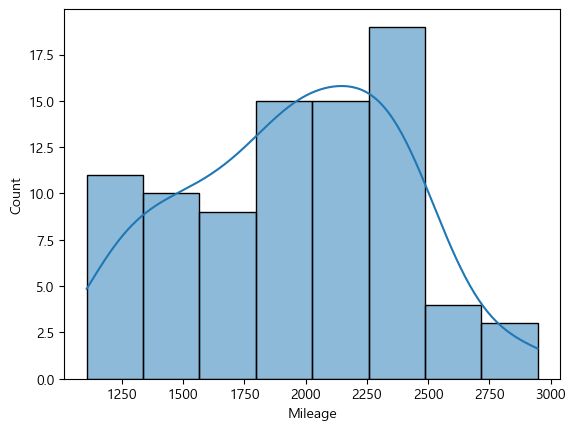

In [42]:
sns.histplot(data=df_channel_Mileage, x='Mileage', kde=True)

##### 등분산 검증
- 신은 위대하다. 즉, 분산이 같다. 
- 결과 : pvalue=0.74로 등분산이다.

<AxesSubplot:xlabel='channel', ylabel='count'>

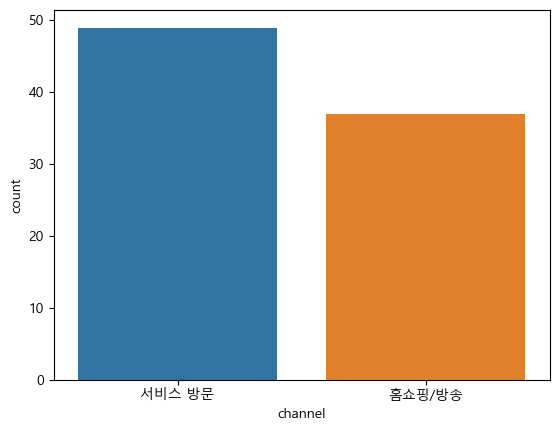

In [43]:
sns.countplot(data=df_channel_Mileage, x='channel')

In [44]:
df_service = df_channel_Mileage[df_channel_Mileage['channel'] == '서비스 방문']
df_service[:2]

,channel,Mileage
0,서비스 방문,1862.0
1,서비스 방문,2532.0


In [45]:
df_homeshopping = df_channel_Mileage[df_channel_Mileage['channel'] == '홈쇼핑/방송']
df_homeshopping[:2]

,channel,Mileage
2,홈쇼핑/방송,2363.0
6,홈쇼핑/방송,2348.0


In [46]:
stats.levene(df_service['Mileage'], df_homeshopping['Mileage'])

LeveneResult(statistic=0.4333426836115636, pvalue=0.5121534935421322)

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

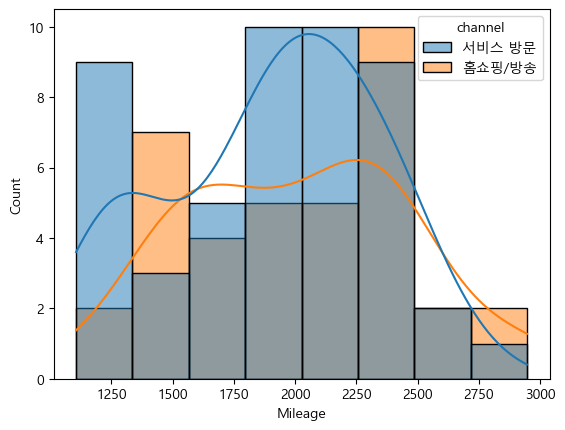

In [47]:
sns.histplot(data=df_channel_Mileage, x='Mileage', kde=True, hue='channel')

In [48]:
stats.ttest_ind(df_service['Mileage'], df_homeshopping['Mileage'], equal_var=True )  # 등분산 일때

Ttest_indResult(statistic=-1.1220535809937369, pvalue=0.26503682144324553)

#### 선정 변수 : (항목 3), \[:100\](정규분포)
- 분석 내용 : 
    - 귀무가설 : 
    - 대립가설 : 
- 분석 결론 (기준 : p-value 0.05)
    - 통계 결론 : 귀무가설이 참,  pvalue=0.198
    - 사실 결론 : 

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

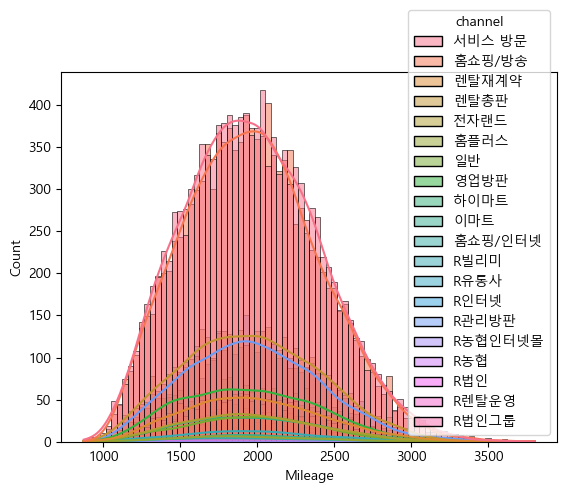

In [50]:
sns.histplot(data=df_TOCC, x='Mileage', kde=True, hue='channel')

In [54]:
df_TOCC['channel'].value_counts()[:13]

서비스 방문    15186
홈쇼핑/방송    12977
렌탈총판       5544
R관리방판      4727
하이마트       3227
영업방판       3039
렌탈재계약      2193
일반         1232
전자랜드       1205
R빌리미        560
이마트         265
홈플러스        225
R인터넷        198
Name: channel, dtype: int64

In [77]:
conditions = ((df_TOCC['channel'] == 'R인터넷') 
                | (df_TOCC['channel'] == '홈쇼핑/방송') 
                  | (df_TOCC['channel'] == '렌탈총판'))
conditions    
df_channel3_Mileage = df_TOCC[conditions][['channel', 'Mileage']][:100]  # 필터링과 축출 동시에 함.

In [62]:
df_channel3_Mileage.isnull().sum()

channel     0
Mileage    28
dtype: int64

In [78]:
df_channel3_Mileage = df_channel3_Mileage.dropna()

##### 정규성 검증
- 5천 개 이하일 때 Shapiro

In [59]:
len(df_channel3_Mileage)

16305

In [82]:
stats.shapiro(df_channel3_Mileage['Mileage'])  # 정규분포로 가정(데이터 확인 어려움) pvalue=0.04

ShapiroResult(statistic=0.972218930721283, pvalue=0.04076038673520088)

##### 등분산 여부 검증

In [83]:
#type(df_channel4_amount['channel'].value_counts())
channel_list = df_channel3_Mileage['channel'].value_counts().index.to_list()
channel_list

['홈쇼핑/방송', '렌탈총판', 'R인터넷']

In [84]:
df_result = [] # list()
for item in channel_list :
    condition = (df_channel3_Mileage['channel'] == item)
    df_result.append(df_channel3_Mileage[condition])   # list index에 DataFrame

In [85]:
df_result[1]

,channel,Mileage
17,렌탈총판,1980.0
40,렌탈총판,1378.0
121,렌탈총판,1194.0
125,렌탈총판,1346.0
130,렌탈총판,1575.0
141,렌탈총판,2148.0
166,렌탈총판,1847.0
168,렌탈총판,1377.0
169,렌탈총판,2729.0
180,렌탈총판,1636.0


In [86]:
stats.levene(df_result[0]['Mileage']
             , df_result[1]['Mileage']
             , df_result[2]['Mileage']) # 등분산 (가정에 의함)

LeveneResult(statistic=1.3990694558452188, pvalue=0.25202796808711486)

##### ANOVA test

In [87]:
stats.f_oneway(df_result[0]['Mileage']
             , df_result[1]['Mileage']
             , df_result[2]['Mileage'])

F_onewayResult(statistic=1.6471871558727058, pvalue=0.19821931226360748)